In [ ]:
# 0.MNIST data
# a)

import numpy as np
import pickle
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

with open('../data/mnist.pkl', 'rb') as f:
    train, val, test = pickle.load(f, encoding='latin1')

X_train, y_train = train
X_test, y_test = test
X_val , y_val = val
X_train_shaped=np.reshape(X_train,(50000, 28, 28))

names =["X_train", "y_train", "X_test", "y_test"]
i = 0


for set in X_train, y_train, X_test, y_test:
    print(f"{names[i]}:\n {set.shape}\n")
    i += 1





X_train:
 (50000, 784)

y_train:
 (50000,)

X_test:
 (10000, 784)

y_test:
 (10000,)



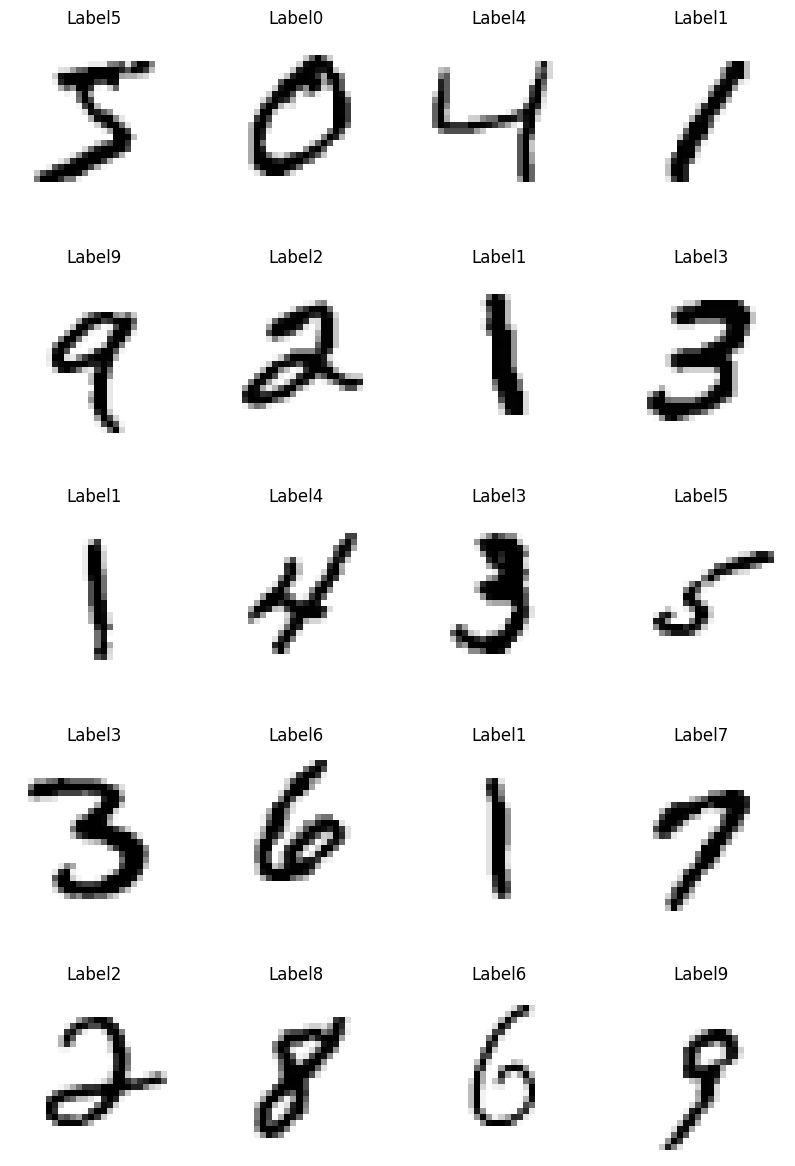

In [ ]:
# d)
fig, axes = plt.subplots(5, 4, figsize = (10, 15))
axes = axes.flatten()
for ax, image, label in zip(axes, X_train_shaped, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label {label}")



In [39]:
# 2
KNN_accu = []

for k_value in range(1, 9):
    KNN_model = KNeighborsClassifier(n_neighbors=k_value)
    KNN_model.fit(X_train, y_train)
    KNN_y = KNN_model.predict(X_val)

    KNN_accu.append(accuracy_score(y_val, KNN_y))

KNN_accu

[0.9712, 0.9667, 0.972, 0.9726, 0.9718, 0.971, 0.9708, 0.9708]

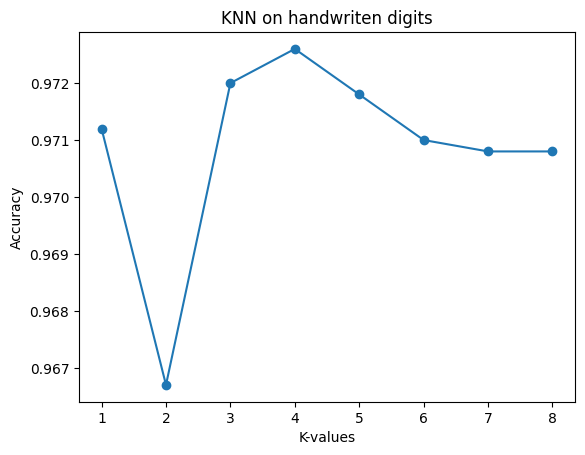

In [40]:
plt.plot(range(1, 9), KNN_accu, marker="o")
plt.xlabel("K-values")
plt.ylabel("Accuracy")
plt.title("KNN on handwriten digits");

In [41]:
# 3)
# a)

# Precision: Percentage of correct positive predictions relative to total positive predictions.
# Recall: Percentage of correct positive predictions relative to total actual positives.
# F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
# Support: Tells us how mnay of that class is in this data set. 

KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train, y_train)
KNN_y = KNN_model.predict(X_val)

print(f"Classification report:\n {classification_report(y_val, KNN_y)}")


# I would say that recal tells me if which class has the most false negativs. Class 8 in this case. Wrong! 

# The precison tells us how many times the model gussed that one class should be true.
# So if the model guessed class 3 95% right, then false it gussed 5% of the time. If the true class, is not
# 3 and it gussed 3, that is a false negative.  



Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       991
           1       0.96      1.00      0.98      1064
           2       0.99      0.97      0.98       990
           3       0.95      0.98      0.97      1030
           4       0.97      0.97      0.97       983
           5       0.97      0.95      0.96       915
           6       0.98      1.00      0.99       967
           7       0.97      0.98      0.97      1090
           8       0.99      0.93      0.96      1009
           9       0.96      0.95      0.96       961

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



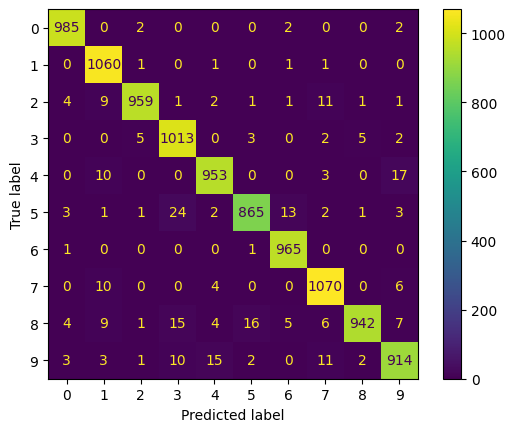

In [42]:
# b)

cm = confusion_matrix(y_val, KNN_y)
ConfusionMatrixDisplay(cm).plot();


In [ ]:
# c)

report_dict = classification_report(y_val, KNN_y, output_dict=True)

for i in range(0, 10):
    precision = report_dict[str(i)]["precision"]
    support = report_dict[str(i)]["support"]
    times_wrong = (1-precision)*support
    print(f"Gussed digit {i} wrong {times_wrong:.0f} number of times")

Gussed digit 0 wrong 15 number of times
Gussed digit 1 wrong 41 number of times
Gussed digit 2 wrong 11 number of times
Gussed digit 3 wrong 48 number of times
Gussed digit 4 wrong 28 number of times
Gussed digit 5 wrong 24 number of times
Gussed digit 6 wrong 22 number of times
Gussed digit 7 wrong 35 number of times
Gussed digit 8 wrong 10 number of times
Gussed digit 9 wrong 38 number of times


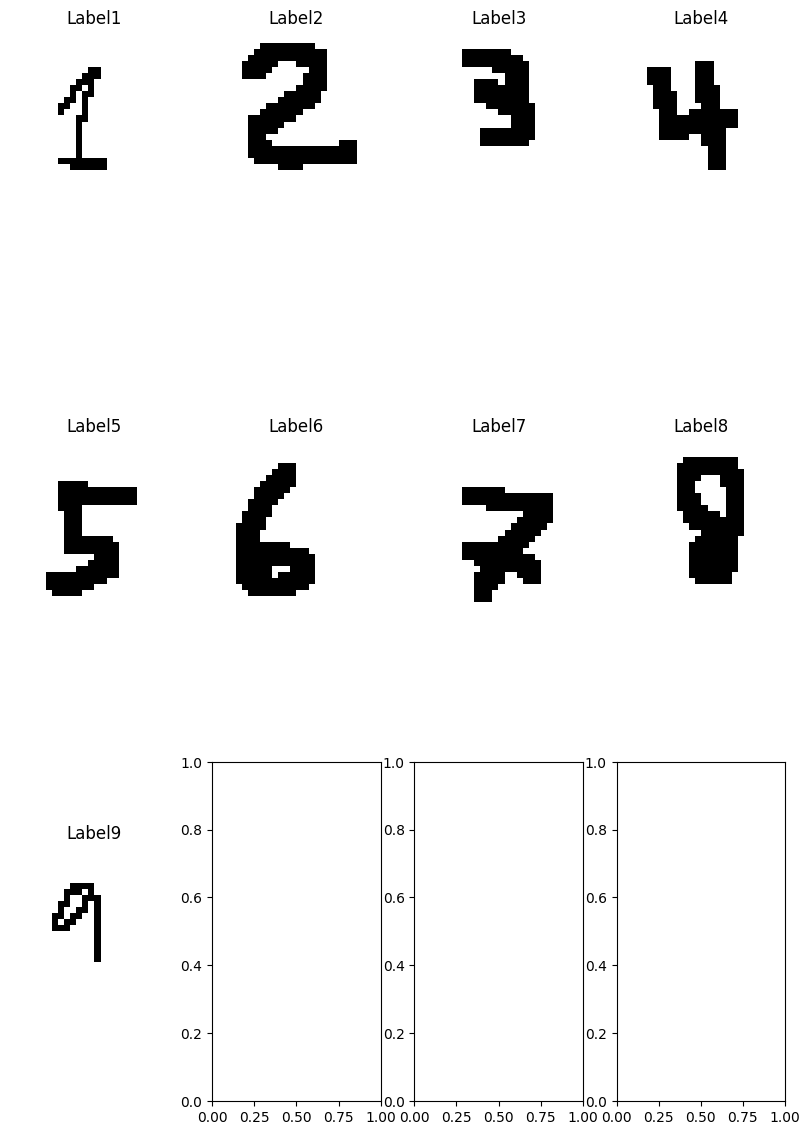

In [166]:
# 4)
import matplotlib.image as plti
import glob
image_file = glob.glob("../data/mina_siffror/*.png")
my_digits = [1 - plti.imread(file) for file in image_file]
my_digits = np.array(my_digits)
my_digits = my_digits[:,:,:,0]
plot_shape = my_digits
my_digits = my_digits.reshape(9,784)

my_labels = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])


my_labels
fig, axes = plt.subplots(3, 4, figsize = (10, 15))
axes = axes.flatten()
for ax, image, label in zip(axes, plot_shape, my_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label{label}")


In [168]:
my_digits_pred = KNN_model.predict(my_digits)
print(f"Classification report:\n {classification_report(my_labels, my_digits_pred)}")

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.67         9
   macro avg       0.60      0.60      0.60         9
weighted avg       0.67      0.67      0.67         9



f:\AI-24-programering\Python-programing-Hannes-Fredriksson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\AI-24-programering\Python-programing-Hannes-Fredriksson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\AI-24-programering\Python-programing-Hannes-Fredriksson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 